# Exploration du jeu de données

La base de données sur laquelle nous allons travailler est la base [MNIST](http://yann.lecun.com/exdb/mnist/) qui regroupe un grand nombre de chiffres écrits à la main et leur label correspondant. Voyons à quoi elle ressemble.

Tensorflow propose directement de télécharger ces données via son API sous la forme d'un jeu de données d'entrainement et un jeu de données de test

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical

In [2]:
tf.__version__

'2.0.0'

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Structure des données

Les variables x et y sont des tableaux de type numpy.ndarray de 60K lignes pour les données d'entrainement et de 10 000 pour les données de test.

Afficher les différentes structures de données, et au moins une des valeurs pour chaque type.

In [4]:
print('x_train : ', x_train.shape, '\n', 
      'y_train : ', y_train.shape, '\n', 
      'x_test : ', x_test.shape, '\n', 
      'y_test : ', y_test.shape, '\n')

x_train :  (60000, 28, 28) 
 y_train :  (60000,) 
 x_test :  (10000, 28, 28) 
 y_test :  (10000,) 



In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [63]:
y_train[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int8)

In [7]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
matprint(x_test[0])

0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0   84  185  159  151   60   36    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  222  254  254  254  254  241  198  198  198  1

In [8]:
y_test[0]

7

## Visualisation des données

In [9]:
import matplotlib.pyplot as plt
import random

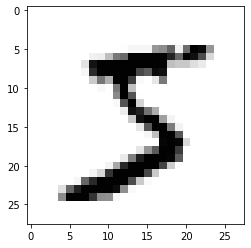

In [10]:
plt.imshow(x_train[0], cmap='Greys')

Visualisation d'une image au hasard dans l'ensemble d'entrainement et donner son étiquette associée:

Image numéro 34235
Label associé: y_train[34235] = 3


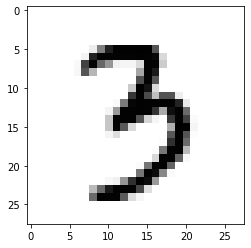

In [11]:
index = random.randrange(60000)
print("Image numéro {}".format(index))
print("Label associé: y_train[{}] = {}".format(index,y_train[index]))
plt.imshow(x_train[index], cmap='Greys')

Visualisation d'une image au hasard dans l'ensemble de test et donner son étiquette associée:

Image numéro 2155
Label associé: y_test[2155] = 0


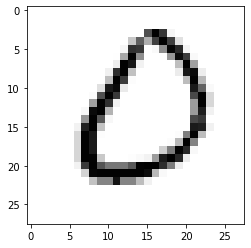

In [12]:
index = random.randrange(10000)
print("Image numéro {}".format(index))
print("Label associé: y_test[{}] = {}".format(index,y_test[index]))
plt.imshow(x_test[index], cmap='Greys')

## Manipulation des images

Créer un pourtour noir d'un pixel autour d'une image choisie et l'afficher.

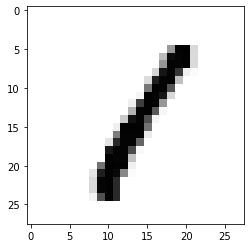

In [13]:
image = x_train[3].copy()
plt.imshow(image, cmap='Greys')

In [14]:
matprint(image)

0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0  124  253  255  63  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0   96  244  251  253  62  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0    0  127  251  251  253  62  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   0    0    0    0    0    0    0    0   68  236  251  211   31   8  0  0  0  0  0  0  
0

Pour créer un pourtour noir, on va mettre la valeur 255 sur les premières et dernières lignes et sur les premières et dernières colonnes.

In [15]:
# Lignes
image[0,:] = 255
image[-1,:] = 255
# Colonnes
image[:, 0] = 255
image[:, -1] = 255

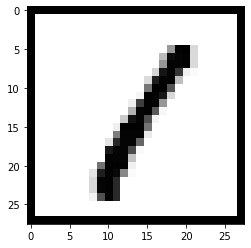

In [16]:
plt.imshow(image, cmap='Greys')

## Utilisation des algorithmes connus

Entre kNN et kmeans, quel serait l'algorithme le plus adéquat pour déterminer le type d'une image de l'ensemble de test. En essayer une implémentation, et donner la précision que cela vous donne.

### k-means

Transformation des matrices en vecteurs (`numpy.ndarray.flatten`) et plus généralement pour condenser des dimensions on utilise `np.reshape`

In [17]:
x_train_km = []
for i in range(len(x_train)):
    x_train_km.append(np.ndarray.flatten(x_train[i]))

In [18]:
#x_train_km[0]

Pour simplifier le travail de l'algorithme, on va définir la position initiale de chaque centroïde sur un chiffre différent.

In [19]:
initial_centroid = []
for k in range(10):
    # Centroïde k = premier élément d'étiquette k dans le dataset x_train
    i = y_train.tolist().index(k)
    initial_centroid.append(x_train_km[i])

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, init=np.array(initial_centroid)).fit(x_train_km)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Taux d'erreur sur l'ensemble d'entraînement

In [21]:
# Visualisation sur les premiers éléments
y_predicted = kmeans.predict(x_train_km[:10])
y_predicted

array([3, 0, 4, 1, 9, 2, 1, 3, 1, 7], dtype=int32)

In [22]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [23]:
# Calcul du taux d'erreur
y_predicted = kmeans.predict(x_train_km)
error_count = 0
for i in range(len(y_train)):
    if y_predicted[i] != y_train[i]:
        error_count += 1
error_count/len(y_train)

0.5120333333333333

Là, on peut commencer à se douter que c'est pas terrible comme méthode

In [24]:
y_predicted = kmeans.predict(x_train_km[-20:])
y_predicted

array([8, 6, 8, 8, 1, 2, 8, 8, 7, 3, 7, 2, 7, 8, 1, 3, 3, 3, 8, 7],
      dtype=int32)

In [25]:
y_train[-20:]

array([3, 6, 6, 2, 1, 2, 6, 0, 7, 8, 9, 2, 9, 5, 1, 8, 3, 5, 6, 8],
      dtype=uint8)

Sur l'ensemble de test, ça nous donne:

In [26]:
x_test_km = x_test.reshape(10000, -1)
x_test_km.shape

(10000, 784)

In [27]:
# Calcul du taux d'erreur
y_predicted = kmeans.predict(x_test_km)
error_count = 0
for i in range(len(y_test)):
    if y_predicted[i] != y_test[i]:
        error_count += 1
error_count/len(y_test)

0.5068

### k-NN

Il n'y a pas de phase d'apprentissage, l'apprentissage correspond simplement à stocker en mémoire l'ensemble d'entraînement.

In [28]:
# Exemple issu de la documentation de scikit learn
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

print(neigh.kneighbors([[1., 1., 1.]]))

(array([[0.5]]), array([[2]]))


#### Cas simplifié

Cas simplifié avec 100 points dans l'ensemble d'entraînement et un test:

In [29]:
samples = np.array(x_train_km[:100])
samples.shape

(100, 784)

In [30]:
neigh = NearestNeighbors(n_neighbors=1)

In [31]:
neigh.fit(samples)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                 radius=1.0)

In [32]:
x_t = x_test[0:1]
x_t.shape

(1, 28, 28)

In [33]:
x_t = x_t.reshape(1, -1)
x_t.shape

(1, 784)

In [34]:
print(neigh.kneighbors(x_t))

(array([[1498.92494809]]), array([[84]]))


Valeur prédite:

In [35]:
y_train[84]

7

Valeur effective

In [36]:
y_test[0]

7

#### Cas général

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
x_train_knn = x_train.reshape(60000, -1)
x_train_knn.shape

(60000, 784)

In [39]:
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                 radius=1.0)

In [40]:
x_test.shape

(10000, 28, 28)

In [41]:
x_test_knn = x_test.reshape(10000, -1)
x_test_knn.shape

(10000, 784)

In [42]:
_, y_index = neigh.kneighbors(x_test_knn)
print(y_index)

[[84]
 [76]
 [99]
 ...
 [57]
 [65]
 [90]]


In [43]:
y_index.shape

(10000, 1)

In [44]:
y_index = np.ndarray.flatten(y_index)

In [45]:
y_index[-1]

90

In [46]:
# Calcul du taux d'erreur
error_count = 0
for i in range(len(y_test)):
    if y_test[i] != y_train[y_index[i]]:
        error_count += 1
error_count/len(y_test)

0.3206

C'est un peu mieux, mais le taux d'erreurs est encore très élevé. Pour essayer d'améliorer ça, on pourrait choisir plusieurs voisins et prendre le chiffre qui apparaît le plus souvent. Mais de toutes façons, on n'obtiendra pas quelque chose de très performant.

## Y One hot encoded

Tranformation de y en une liste de vecteur de type "one hot encoded": vecteur de la taille de l'ensemble des catégories, toutes les valeurs sont nulles sauf celle qui correspond à sa catégorie qui vaut 1.

Par exemple le `5` vaut `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`. Trouver et implémenter la fonction qui permet de faire ça.

In [47]:
y_train[0]

5

In [48]:
y_train = to_categorical(y_train, dtype='int8')

In [49]:
y_train[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int8)

## Etude de la fonction softmax

Quel est l'usage de cette fontion?

Le fonction softmax $\sigma$ est définie de la façon suivante:
$\sigma : R^K \to R^K$

A un vecteur $$z=(z_1,...,z_K)$$ on associe un vecteur $$\sigma=(\sigma_1,...,\sigma_K)$$ tel que pour chaque j $$\sigma(z)_j = \displaystyle\frac{e^{z_j}}{\sum\limits_{k=1}^{K} e^{z_k}}$$

Créer une fonction python qui implémente cette fonction softmax, et la tester sur `z = [123, 456, 789]`. 
Que remarquez vous ?

Comment régler le problème rencontré? Réécrire la fonction numériquement stable.

In [58]:
np.exp(0)

1.0

In [50]:
np.exp([1, 2])

array([2.71828183, 7.3890561 ])

In [51]:
def softmax(x):
    denominator = np.sum(np.exp(x))
    return np.exp(x)/denominator

In [52]:
softmax([1,2,5])

array([0.01714783, 0.04661262, 0.93623955])

In [53]:
softmax([123, 456, 789])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 0.,  0., nan])

In [54]:
def stable_softmax(x):
    x = x - np.max(x)
    denominator = np.sum(np.exp(x))
    return np.exp(x)/denominator

In [55]:
stable_softmax([123, 456, 789])

array([5.75274406e-290, 2.39848787e-145, 1.00000000e+000])

In [64]:
stable_softmax([1,2,5])

array([0.01714783, 0.04661262, 0.93623955])

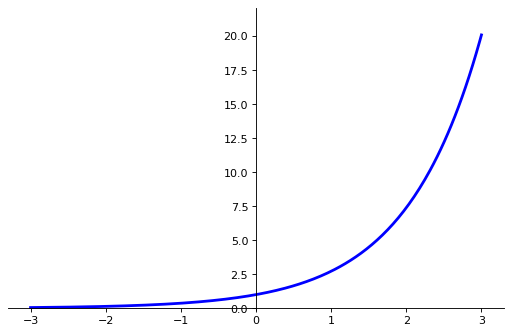

In [62]:
from pylab import *

figure(figsize=(8,5), dpi=80)
subplot(111)

X = np.linspace(-3, 3, 256,endpoint=True)
C = np.exp(X)
plot(X, C, color="blue", linewidth=2.5, linestyle="-")

ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

xlim(X.min()*1.1, X.max()*1.1)
#xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
#       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

ylim(-0.1,C.max()*1.1)
#yticks([-1, 0, +1],
#       [r'$-1$', r'$0$', r'$+1$'])

show()